<a href="https://colab.research.google.com/github/Niveditavs04/Niveditavs04/blob/main/mlp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 8**

Machine learning case study for readily available data sets using the techniques studied, and evaluate the designed and  implemented model.

Problem statement: *CAR EVALUATION USING MACHINE LEARNING *

BY

UCE2022570-Priti Narlawar

UCE2022573-Sanika Nikam

UCE2022574-Nivedita Shinde


**INTRODUCTION**

 In the fast-paced automotive industry, making informed decisions about car purchases or evaluations is crucial for consumers, manufacturers, and dealerships alike. Traditional methods of evaluating cars often rely on subjective opinions or limited datasets, leading to inconsistent or biased results.
To address these challenges, we have developed a robust machine learning model for car evaluation. Leveraging the power of Random Forest, a versatile and powerful ensemble learning technique, our model provides accurate and reliable evaluations based on a comprehensive set of features. Key Features of Our Model:


Random Forest Algorithm:

 Random Forest is a powerful ensemble learning method that combines the strength of multiple decision trees to deliver robust and accurate predictions. By aggregating the predictions of individual trees, Random Forest mitigates overfitting and enhances generalization, making it well-suited for complex classification tasks like car evaluation.


Comprehensive Dataset: Our model is trained on a rich and diverse dataset comprising various attributes of cars, including buying price, maintenance cost, number of doors, seating capacity, luggage boot size, and safety features. This extensive dataset ensures that our model captures the nuanced relationships between different car features and their overall evaluation.


Objective Evaluation: Unlike traditional evaluation methods that may be influenced by subjective opinions or biases, our machine learning model provides an objective and data-driven approach to car evaluation. By analyzing the inherent patterns and correlations in the dataset, our model delivers consistent and reliable evaluations, empowering consumers to make informed decisions.


**Scalability and Adaptability**: Our model is designed to be scalable and adaptable, capable of handling large volumes of data and accommodating new features or updates as needed. Whether evaluating individual cars or analyzing trends across different market segments, our model delivers consistent performance and actionable insights.


**Data set information**

About Dataset

from: https://archive.ics.uci.edu/ml/datasets/car+evaluation

Title: Car Evaluation Database

Sources:

(a) Creator: Marko Bohanec

(b) Donors: Marko Bohanec (marko.bohanec@ijs.si)

Blaz Zupan (blaz.zupan@ijs.si)

(c) Date: June, 1997

Past Usage:

The hierarchical decision model, from which this dataset is
derived, was first presented in
M. Bohanec and V. Rajkovic: Knowledge acquisition and explanation for
multi-attribute decision making. In 8th Intl Workshop on Expert
Systems and their Applications, Avignon, France. pages 59-78, 1988.
Within machine-learning, this dataset was used for the evaluation
of HINT (Hierarchy INduction Tool), which was proved to be able to
completely reconstruct the original hierarchical model. This,
together with a comparison with C4.5, is presented in
B. Zupan, M. Bohanec, I. Bratko, J. Demsar: Machine learning by
function decomposition. ICML-97, Nashville, TN. 1997 (to appear)

Number of Instances: 1728
(instances completely cover the attribute space)

Number of Attributes: 6

Attribute Values:

buying v-high, high, med, low

maint v-high, high, med, low

doors 2, 3, 4, 5-more

persons 2, 4, more

lug_boot small, med, big

safety low, med, high

Missing Attribute Values: none

Class Distribution (number of instances per class)

class N N[%]

unacc 1210 (70.023 %)

acc 384 (22.222 %)

good 69 ( 3.993 %)

v-good 65 ( 3.762 %)



Code and output



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv("/content/car evaluation_with.csv",header = None)
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.shape

(1727, 7)

In [ ]:
col_names = ['buying','maint','doors', 'persons', 'lug_boot', 'safety', 'class']
df.columns = col_names
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   int64 
 3   persons   1727 non-null   int64 
 4   lug_boot  1727 non-null   object
 5   safety    1727 non-null   object
 6   class     1727 non-null   object
dtypes: int64(2), object(5)
memory usage: 94.6+ KB


In [ ]:
for col in col_names:
    print(df[col].value_counts())

buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
3    432
4    432
5    432
2    431
Name: count, dtype: int64
persons
4    576
5    576
2    575
Name: count, dtype: int64
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safety
med     576
high    576
low     575
Name: count, dtype: int64
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

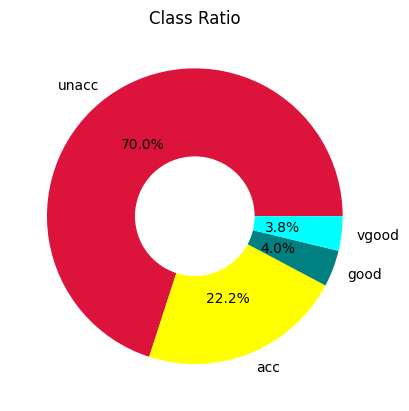

In [ ]:
# Exploratory Data Analysis
Class=df['class'].value_counts()
#create a pie chart
plt.pie(Class.values, labels=Class.index, colors=["crimson", "yellow", "teal", "aqua"], autopct='%1.1f%%')
plt.title("Class Ratio")
my_circle=plt.Circle((0,0), 0.4, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()
## Class distribution
Class=df['class'].value_counts()

<Axes: xlabel='persons', ylabel='count'>

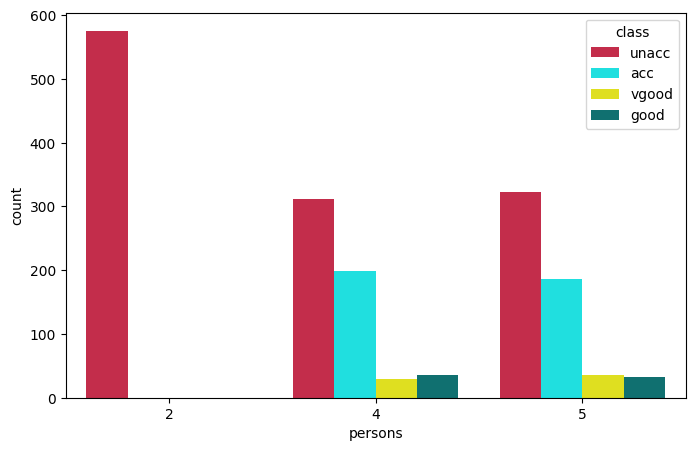

In [ ]:
## Class acceptance based on number of persons
plt.figure(figsize=(8, 5))
sns.countplot(x ='persons',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )

<ipython-input-8-66a471bff9b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='maint', y='persons', palette=["crimson", "aqua", "yellow", "teal"])


<Axes: xlabel='maint', ylabel='persons'>

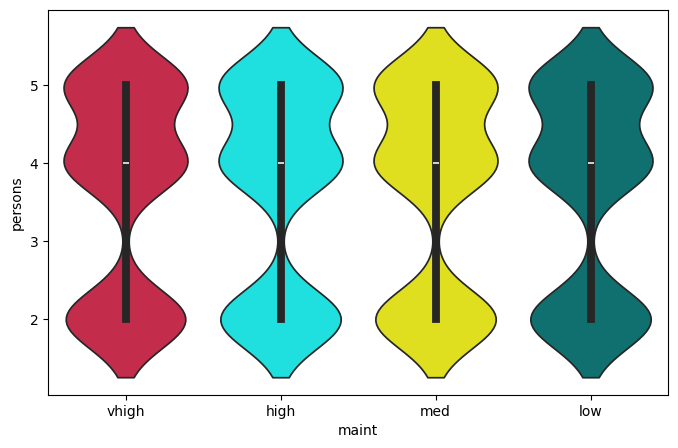

In [ ]:
## Number of persons based on maintenance price
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='maint', y='persons', palette=["crimson", "aqua", "yellow", "teal"])


<Axes: xlabel='safety', ylabel='count'>

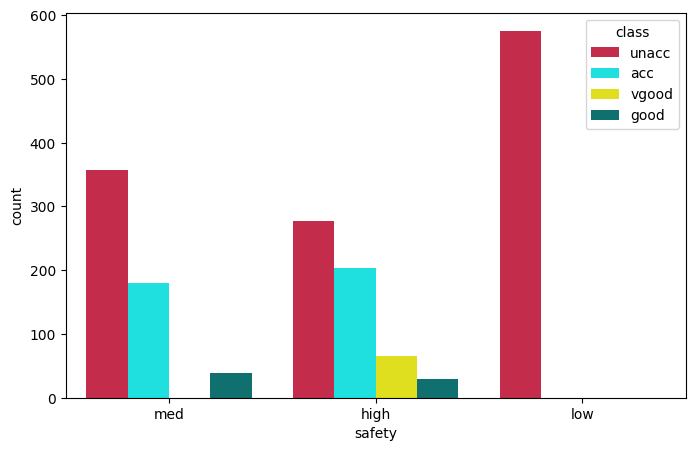

In [ ]:
## Class acceptance level in relation to safety measure
plt.figure(figsize=(8, 5))
sns.countplot(x ='safety',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )

<Axes: xlabel='maint', ylabel='count'>

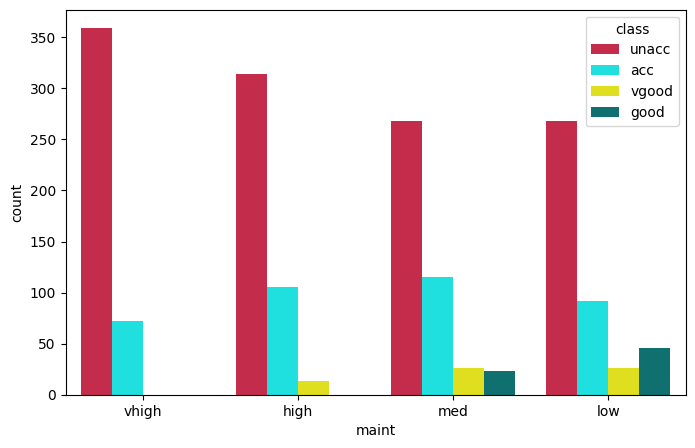

In [ ]:
## Acceptance class level affected by maintenance price
plt.figure(figsize=(8, 5))
sns.countplot(x ='maint',hue = 'class',data = df, palette=["crimson", "aqua", "yellow", "teal"] )

In [ ]:
x = df.drop(['class'],axis = 1)
y = df['class']
x.shape,y.shape

((1727, 6), (1727,))

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)
x_train.shape,x_test.shape

((1157, 6), (570, 6))

In [ ]:
x_train.dtypes

buying      object
maint       object
doors        int64
persons      int64
lug_boot    object
safety      object
dtype: object

In [ ]:
x_train.head(20)

,buying,maint,doors,persons,lug_boot,safety
83,vhigh,vhigh,5,2,med,low
48,vhigh,vhigh,3,5,med,med
468,high,vhigh,3,4,small,med
155,vhigh,high,3,5,med,low
1043,med,high,4,5,small,low
1563,low,med,3,5,big,med
1395,low,vhigh,5,5,small,med
1506,low,high,5,5,med,med
500,high,vhigh,4,4,big,low
179,vhigh,high,4,5,small,low


In [ ]:
!pip install category_encoders
#for encoding categorical variables in machine learning pipelines.
import category_encoders as ce
encoder = ce.OrdinalEncoder(cols = x_train.columns)
x_train = encoder.fit_transform(x_train)
x_test = encoder.transform(x_test)
x_train.head(20)

# buying and maint =>vhigh=1,high='2',med='3',low='4'
#doors=> 5='1',3='2',4='3',2='4'
#persons=> 2='1',5='2',4='3'

#lug_boot=>med='1',small='2',big='3'
#safety=>low='1',med='2',high='3'


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.2 MB/s eta 0:00:00


,buying,maint,doors,persons,lug_boot,safety
83,1,1,1,1,1,1
48,1,1,2,2,1,2
468,2,1,2,3,2,2
155,1,2,2,2,1,1
1043,3,2,3,2,2,1
1563,4,3,2,2,3,2
1395,4,1,1,2,2,2
1506,4,2,1,2,1,2
500,2,1,3,3,3,1
179,1,2,3,2,2,1


Correlation between columns:


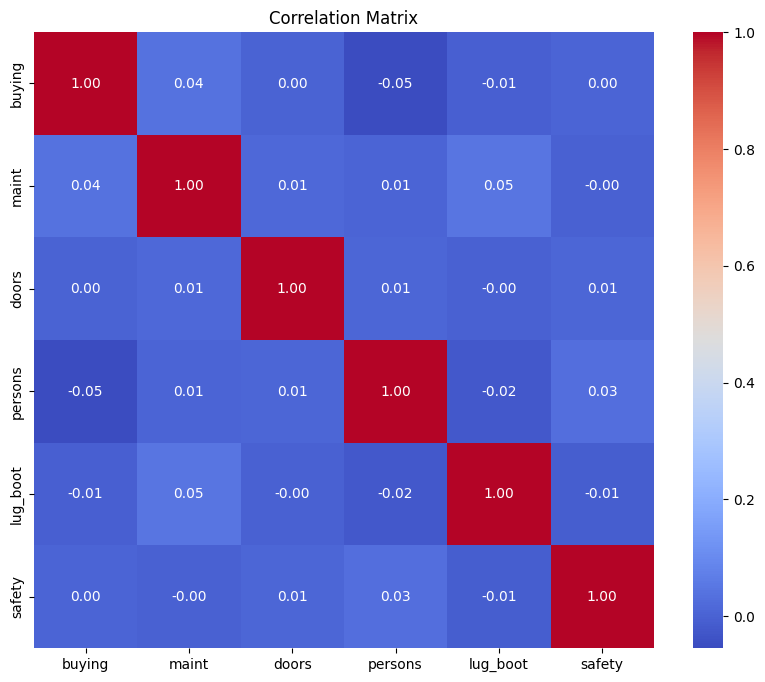

In [ ]:
# Display the correlation matrix
correlation_matrix = x_train.corr()
print("Correlation between columns:")
#print(correlation_matrix)

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [ ]:
x_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,3,1,3,1
932,3,1,3,3,3,1
628,2,2,1,1,3,3
1497,4,2,1,3,1,2
1262,3,4,3,2,1,1


In [ ]:
x_train.tail()

,buying,maint,doors,persons,lug_boot,safety
1130,3,3,2,2,3,1
1294,3,4,1,2,3,3
860,2,4,1,2,3,1
1459,4,2,3,1,2,3
1126,3,3,2,2,2,3


In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report
## Model Cross Validation Using Stratified K-Fold
svm_classifier = SVC(kernel='linear', C=1)
knn_classifier = KNeighborsClassifier(n_neighbors=3)
dt_classifier = DecisionTreeClassifier(random_state=42)
stratified_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
svm_scores = cross_val_score(svm_classifier, x_train, y_train, cv=stratified_kfold, scoring='accuracy')
knn_scores = cross_val_score(knn_classifier, x_train, y_train, cv=stratified_kfold, scoring='accuracy')
dt_scores = cross_val_score(dt_classifier, x_train, y_train, cv=stratified_kfold, scoring='accuracy')

## Print average accuracy for each classifier
print("SVM Average Accuracy:", svm_scores.mean())
print("KNN Average Accuracy:", knn_scores.mean())
print("Decision Tree Average Accuracy:", dt_scores.mean())

SVM Average Accuracy: 0.8219523136621584
KNN Average Accuracy: 0.8962766076755714
Decision Tree Average Accuracy: 0.9567884619698092


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         acc       0.72      0.75      0.74       122
        good       1.00      0.31      0.47        59
       unacc       0.94      0.96      0.95       389
       vgood       0.00      0.00      0.00         0

    accuracy                           0.85       570
   macro avg       0.67      0.51      0.54       570
weighted avg       0.90      0.85      0.85       570

   Features  Importances
3   persons     0.385602
5    safety     0.282162
1     maint     0.234266
0    buying     0.097970
2     doors     0.000000
4  lug_boot     0.000000


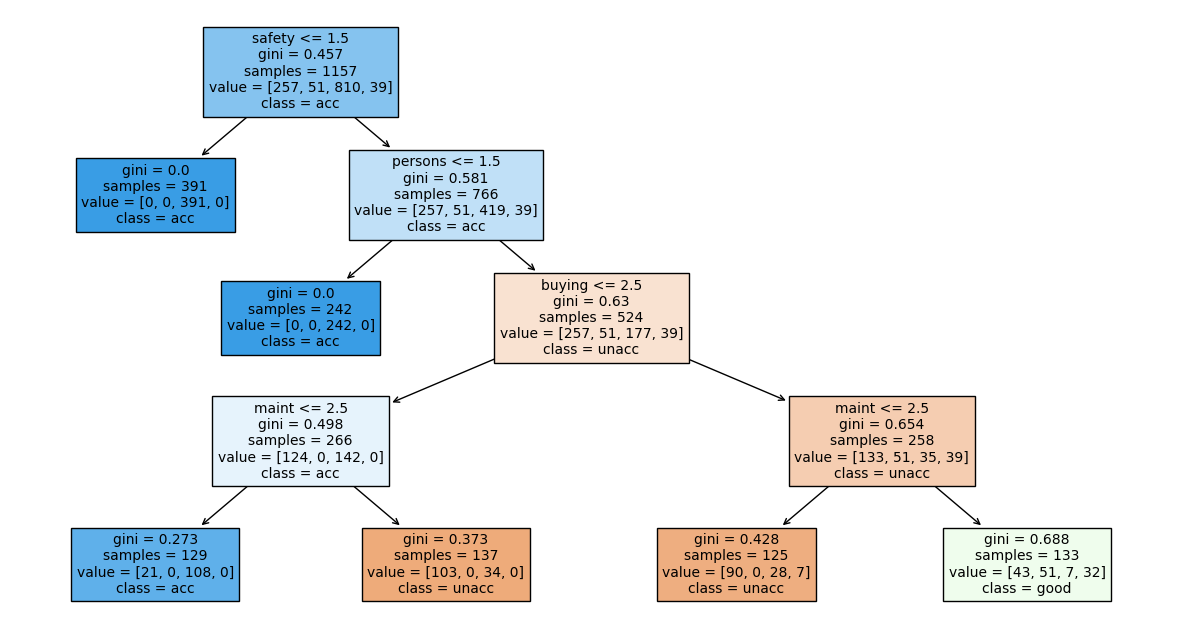

In [ ]:
dt = DecisionTreeClassifier(max_depth=4, random_state=0)
dt.fit(x_train, y_train)
prediction = dt.predict(x_test)

# Performance of the trained classifier on the test set
print(classification_report(prediction, y_test))

# Visualize Decision Tree
plt.figure(figsize=(15, 8))
plot_tree(dt, filled=True, fontsize=10, feature_names=x_train.columns, class_names=y_train.unique())

# Feature Importances
feature_names = x_train.columns
dfFeatures = pd.DataFrame({'Features': feature_names.tolist(), 'Importances': dt.feature_importances_})
top_features = dfFeatures.sort_values(by='Importances', ascending=False).head(6)
print(top_features)

In [ ]:
# Example test input
buy=int(input("Enter buying budget(vhigh='1' ,high='2',med='3',low='4'):"))
main=int(input("Enter maintainance budget(vhigh='1' ,high='2',med='3',low='4'):"))
doors=int(input("Enter no. of doors(for 5 doors type '1',3='2',4='3',2='4'):"))
persons=int(input("Enter no. of  persons (2='1',5='2',4='3'):"))
lug_boot=int(input("Enter lugboot space(med='1',small='2',big='3'):"))
safety=int(input("Enter safety level(low='1',med='2',high='3'):"))


test_input = pd.DataFrame({
    'buying': [buy],    # Example value for buying (1, 2, 3, 4)
    'maint': [main],     # Example value for maint (1, 2, 3, 4)
    'doors': [doors],     # Example value for doors (2, 3, 4, 5)
    'persons': [persons],   # Example value for persons (2, 4, 5)
    'lug_boot': [lug_boot],  # Example value for lug_boot (1, 2, 3)
    'safety': [safety]     # Example value for safety (1, 2, 3)
})

# buying and maint =>vhigh=1 ,high='2',med='3',low='4'
#doors=> 5='1',3='2',4='3',2='4'
#persons=> 2='1',5='2',4='3'

#lug_boot=>med='1',small='2',big='3'
#safety=>low='1',med='2',high='3'
# Display the example test input
print("Example Test Input:")
print(test_input)

# Make prediction on the example test input
predicted_class = dt.predict(test_input)

# Display the predicted class label
print("\nPredicted Class Label:")
print(predicted_class)

'''Example Test Input:
   buying  maint  doors  persons  lug_boot  safety
0       4      4      4        5         2       3

Predicted Class Label:
['good']'''

Enter buying budget(vhigh='1' ,high='2',med='3',low='4'):4
Enter maintainance budget(vhigh='1' ,high='2',med='3',low='4'):4
Enter no. of doors(for 5 doors type '1',3='2',4='3',2='4'):4
Enter no. of  persons (2='1',5='2',4='3'):2
Enter lugboot space(med='1',small='2',big='3'):1
Enter safety level(low='1',med='2',high='3'):3
Example Test Input:
   buying  maint  doors  persons  lug_boot  safety
0       4      4      4        2         1       3

Predicted Class Label:
['good']


"Example Test Input:\n   buying  maint  doors  persons  lug_boot  safety\n0       4      4      4        5         2       3\n\nPredicted Class Label:\n['good']"

In [ ]:
#RFCM
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 10,random_state = 0)
#fit the model
rfc.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

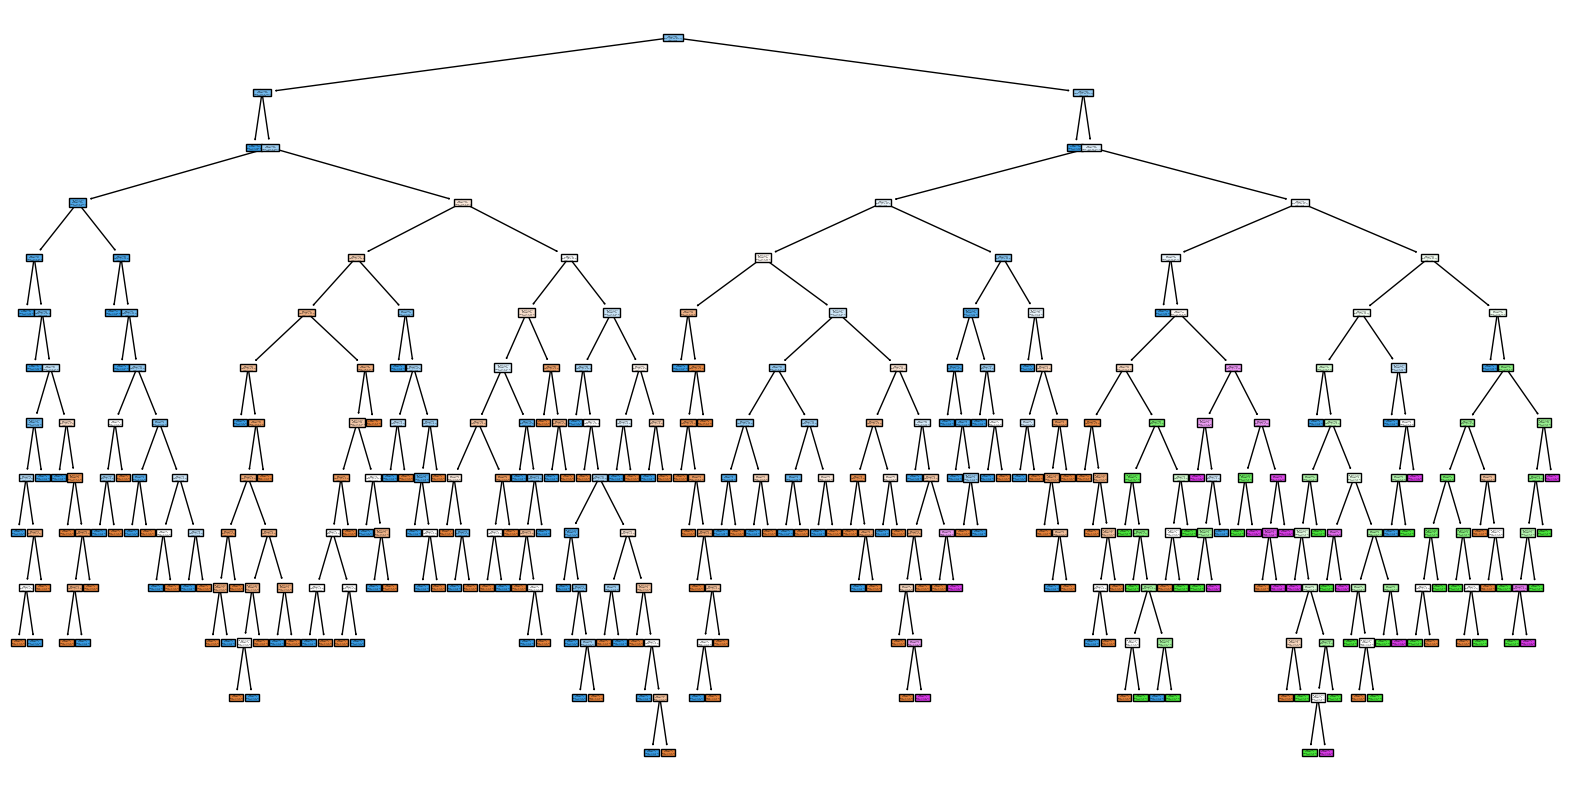

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Define feature names and class names
feature_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']
class_names = ['unacc', 'acc', 'good', 'vgood']

# Visualizing one of the trees
plt.figure(figsize=(20, 10))
plot_tree(rfc.estimators_[0], filled=True, feature_names=feature_names, class_names=class_names)
plt.show()

In [ ]:
y_pred = rfc.predict(x_test)
y_pred

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'acc', 'unacc', 'unacc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'good', 'unacc', 'unacc', 'good', 'unacc',
       'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'vgood', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',

In [ ]:
# Example test input
buy=int(input("Enter buying budget(vhigh='1' ,high='2',med='3',low='4'):"))
main=int(input("Enter maintainance budget(vhigh='1' ,high='2',med='3',low='4'):"))
doors=int(input("Enter no. of doors(for 5 doors type '1',3='2',4='3',2='4'):"))
persons=int(input("Enter no. of  persons (2='1',5='2',4='3'):"))
lug_boot=int(input("Enter lugboot space(med='1',small='2',big='3'):"))
safety=int(input("Enter safety level(low='1',med='2',high='3'):"))


test_input = pd.DataFrame({
    'buying': [buy],    # Example value for buying (1, 2, 3, 4)
    'maint': [main],     # Example value for maint (1, 2, 3, 4)
    'doors': [doors],     # Example value for doors (2, 3, 4, 5)
    'persons': [persons],   # Example value for persons (2, 4, 5)
    'lug_boot': [lug_boot],  # Example value for lug_boot (1, 2, 3)
    'safety': [safety]     # Example value for safety (1, 2, 3)
})

# buying and maint =>vhigh=1 ,high='2',med='3',low='4'
#doors=> 5='1',3='2',4='3',2='4'
#persons=> 2='1',5='2',4='3'

#lug_boot=>med='1',small='2',big='3'
#safety=>low='1',med='2',high='3'
# Display the example test input
print("Example Test Input:")
print(test_input)

# Make prediction on the example test input
predicted_class = rfc.predict(test_input)

# Display the predicted class label
print("\nPredicted Class Label:")
print(predicted_class)

'''Example Test Input:
   buying  maint  doors  persons  lug_boot  safety
0       4      4      4        5         2       3

Predicted Class Label:
['good']'''

Enter buying budget(vhigh='1' ,high='2',med='3',low='4'):4
Enter maintainance budget(vhigh='1' ,high='2',med='3',low='4'):4
Enter no. of doors(for 5 doors type '1',3='2',4='3',2='4'):3
Enter no. of  persons (2='1',5='2',4='3'):2
Enter lugboot space(med='1',small='2',big='3'):1
Enter safety level(low='1',med='2',high='3'):3
Example Test Input:
   buying  maint  doors  persons  lug_boot  safety
0       4      4      3        2         1       3

Predicted Class Label:
['vgood']


"Example Test Input:\n   buying  maint  doors  persons  lug_boot  safety\n0       4      4      4        5         2       3\n\nPredicted Class Label:\n['good']"

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9473684210526315

In [ ]:
#RFnestimators
rfc = RandomForestClassifier(n_estimators = 100,random_state = 0)
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=0)

In [ ]:
y_pred1 = rfc.predict(x_test)
y_pred1

array(['unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'acc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'good', 'unacc', 'unacc', 'good',
       'unacc', 'unacc', 'vgood', 'acc', 'acc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc',
       'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'acc', 'unacc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'good', 'unacc', 'acc', 'acc', 'unacc', 'unacc', 'unacc', 'acc',
       'unacc', 'unacc', 'unacc', 'unacc', 'vgood', 'unacc', 'unacc',
       'acc', 'unacc', 'acc', 'unacc', 'unacc', 'acc', 'acc', 'unacc',
       'good', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
       'unacc', 'acc', 'unacc', 'unacc', 'unacc', 'unacc', 'unacc',
   

In [ ]:
accuracy_score(y_test,y_pred1)

0.9649122807017544

In [ ]:
#Feature Importance
clf = RandomForestClassifier(n_estimators = 100,random_state = 0)
clf.fit(x_train,y_train)
feature_scores = pd.Series(clf.feature_importances_,index = x_train.columns).sort_values(ascending = False)
feature_scores
# represents the importance of each feature in your Random Forest classifier.

safety      0.291657
persons     0.235380
buying      0.160692
maint       0.134143
lug_boot    0.111595
doors       0.066533
dtype: float64

<Axes: xlabel='None', ylabel='None'>

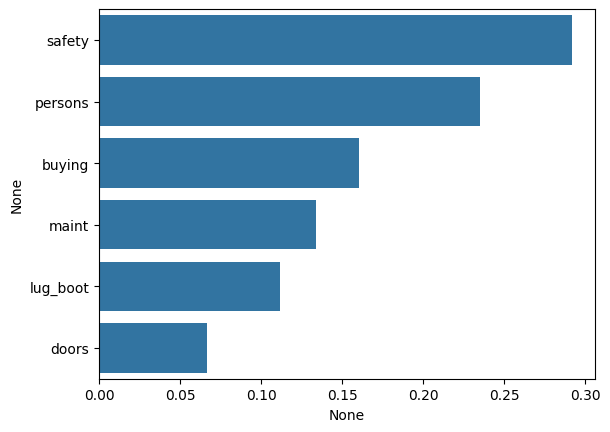

In [ ]:
#Visualize feature scores of the features
sns.barplot(x = feature_scores,y = feature_scores.index)

In [ ]:
#Build Random Forest model on selected features

x = df.drop(['class','doors'],axis = 1)
y = df['class']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.33,random_state = 42)
encoder = ce.OrdinalEncoder(cols = x_train.columns )


x_train = encoder.fit_transform(x_train)

x_test = encoder.transform(x_test)
clf = RandomForestClassifier(n_estimators = 10, random_state=0)
clf.fit(x_train, y_train)

RandomForestClassifier(n_estimators=10, random_state=0)

In [ ]:
y_pred = clf.predict(x_test)
accuracy_score(y_test,y_pred)

0.9315789473684211

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[108   6  12   1]
 [  0  13   0   5]
 [  9   0 390   0]
 [  5   1   0  20]]


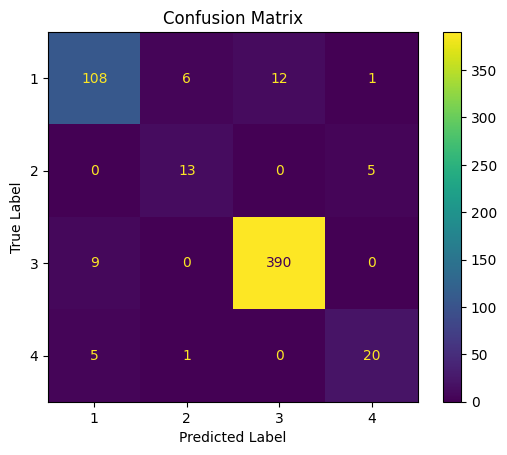

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
matrix = confusion_matrix(y_test, y_pred)
confusion_matrix_display = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=[1,2,3,4])
confusion_matrix_display.plot()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.85      0.87       127
        good       0.65      0.72      0.68        18
       unacc       0.97      0.98      0.97       399
       vgood       0.77      0.77      0.77        26

    accuracy                           0.93       570
   macro avg       0.82      0.83      0.82       570
weighted avg       0.93      0.93      0.93       570



**Conclusion**

The analysis of the "Car Evaluation Data Set" reveals several key insights into the factors influencing car acceptability and the performance of the Random Forest Classifier model:

**Key Attributes Influencing Car Acceptability**: The analysis indicates that safety is the primary concern for car buyers. If a car is perceived as unsafe, it significantly impacts its acceptability. Following safety, the capacity of the car to carry passengers becomes crucial. Cars with a seating capacity exceeding four passengers face reduced acceptability. Maintenance cost and buying price also influence decisions, with lower costs being preferred. Additionally, luggage capacity serves as a final consideration.

***Data Preparation and Model Training***: The dataset is appropriately prepared, with features representing various attributes of cars and their corresponding classes. The Random Forest Classifier is chosen for its ability to handle complex data and prevent overfitting by combining multiple decision trees during training.

**Hyperparameter Tuning**: The model is trained with different values of the n_estimators hyperparameter, allowing for the comparison of model performance with 10 and 100 decision trees.

**Model Evaluation**: The performance of the trained models is evaluated using accuracy, confusion matrix, and classification report metrics, providing insights into the model's predictive capabilities for different car classes.

**Feature Importance and Selection**: Feature importance analysis identifies the most influential attributes in predicting car acceptability, aiding in understanding the underlying decision-making process of the model. Additionally, feature selection demonstrates the impact of removing certain attributes, such as 'doors', on model performance.

**Deployment and Applications**: The Random Forest Classifier model can be deployed in various applications within the automotive industry and related sectors. These include car dealership websites for customer recommendations, car rental companies for fleet management, market analysis in the automotive industry, and risk assessment for insurance companies.

*In conclusion, the Random Forest Classifier offers a robust solution for classifying car acceptability based on attributes, providing valuable insights for decision-making across multiple domains within the automotive industry and beyond.*

References:

https://pandas.pydata.org/

https://scikit-learn.org/stable/

https://seaborn.pydata.org/tutorial/introduction.html

https://www.kaggle.com/